In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram

In [134]:
# generate gaussian noise with mean 0 and variance sigma^2

def generate_noise(sigma, n):
    return np.random.normal(0, sigma, n)


def compute_periodogram(x, sample_freq=1,):

    periodogram = np.abs(np.fft.fft(x))**2
    periodogram = periodogram / len(periodogram)
    periodogram = periodogram[:len(periodogram)//2]
    
    freq = np.fft.fftfreq(len(x), 1/sample_freq)
    freq = freq[:len(freq)//2]

    return periodogram, freq

In [159]:
P_ns = []
N_SIM = 100
N_SAMPLES = 1000
K = 1

for _ in range(N_SIM):
    X_n = generate_noise(1, N_SAMPLES)
    P_n = []
    for extract in np.array_split(X_n, K):
        freq, periodo = periodogram(extract, fs=1, scaling='density', detrend=False, return_onesided=True, axis=-1)
        #periodo, freq = compute_periodogram(extract)
        P_n.append(periodo)
    P_ns.append(np.mean(P_n, axis=0))



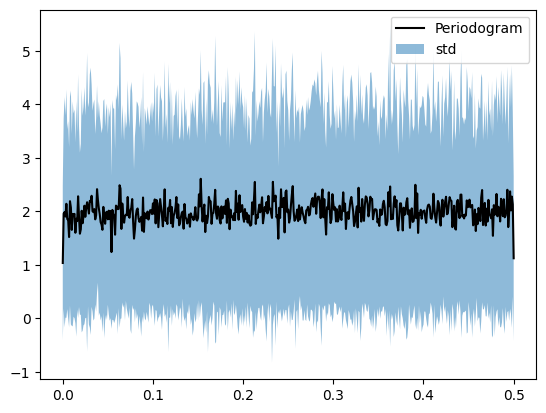

In [160]:
#plot periodogram mean and std in blue and red respectively
P_n = np.mean(P_ns, axis=0)
v_P_n = np.std(P_ns, axis=0)


plt.plot(freq, P_n, label='Periodogram', color='black')
plt.fill_between(freq, P_n+ v_P_n, P_n- v_P_n, alpha=0.5, label='std')
plt.legend()
plt.show()

In [137]:
X_n.shape

(1000,)